In [190]:
import pandas as pd
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
pd.set_option('display.max_rows', None)

Data Cleaning

In [191]:
#remove irrelevant data
df_train_clean = df_train
df_train_clean.drop(["SK_ID_CURR"],inplace=True,axis=1)
df_train_clean.drop(["FLAG_MOBIL"],inplace=True,axis=1)

In [192]:
#handling missing values
for i in df_train_clean.columns:
  if df_train_clean[i].isnull().sum()*100/len(df_train_clean) > 0.4:
    df_train_clean.drop(i,inplace=True,axis=1) 

df_train_clean["AMT_ANNUITY"].fillna(df_train_clean["AMT_ANNUITY"].mean(),inplace=True)
df_train_clean["AMT_GOODS_PRICE"].fillna(df_train_clean["AMT_GOODS_PRICE"].mean(),inplace=True)
df_train_clean["EXT_SOURCE_2"].fillna(df_train_clean["EXT_SOURCE_2"].mean(),inplace=True)
df_train_clean.dropna(how="any",inplace=True)

df_test_clean = df_test
df_test_clean["AMT_ANNUITY"].fillna(df_test_clean["AMT_ANNUITY"].mean(),inplace=True)
df_test_clean["AMT_GOODS_PRICE"].fillna(df_test_clean["AMT_GOODS_PRICE"].mean(),inplace=True)
df_test_clean["EXT_SOURCE_2"].fillna(df_test_clean["EXT_SOURCE_2"].mean(),inplace=True)
df_test_clean.dropna(how="any",inplace=True)

In [193]:
#remove duplicate
df_train.duplicated().sum()
df_train_clean = df_train.drop_duplicates()

Data Visualization

In [ ]:
# feature selection using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_train_clean.corr()
plt.figure(figsize=(40,24))
sns.heatmap(corr,cmap="RdYlGn",annot=True)


Label Encoding

In [ ]:
for i in df_train_clean.columns:
  if df_train_clean[i].dtypes == 'object':
    df_train_clean[i] = df_train_clean[i].astype('category').cat.codes

df_train_clean.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


Feature Selection

In [ ]:
col_corr = []
matrix = df_train_clean.iloc[:,1:].corr()
for i in range(len(matrix)):
  for j in range(i):
    if abs(matrix.iloc[i,j]) >= 0.4 and (matrix.columns[j] not in col_corr):
      col_name = matrix.columns[i]
      col_corr.append(col_name)

print(col_corr)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8']


Normalization

In [ ]:
pd.set_option('display.max_rows', 10)
x_train = df_train_clean[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6']]
y_train =df_train_clean['TARGET']
x_test = df_test_clean[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6']]

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)
print(x_test)

[[0.07829063 0.04601571 0.04412053 ... 0.00581395 0.         0.        ]
 [0.08545104 0.07968575 0.04183424 ... 0.01453488 1.         0.        ]
 [0.02544753 0.00673401 0.03993162 ... 0.00872093 0.         0.        ]
 ...
 [0.21863812 0.15824916 0.04299826 ... 0.00290698 1.         0.        ]
 [0.06874342 0.04601571 0.04509924 ... 0.         1.         0.        ]
 [0.12114777 0.04601571 0.0348971  ... 0.00290698 0.         0.        ]]


Handling Over/Undersampling 

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train = np.array(x_train)
x_train, y_train = sm.fit_resample(x_train, y_train)
print(y_train.value_counts())

1    281698
0    281698
Name: TARGET, dtype: int64


Building Model

In [ ]:
from numpy import mean, std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict,StratifiedKFold
import matplotlib.pyplot as pyplot

k_fold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

Logistic Regression

In [ ]:
clf = LogisticRegression(solver='liblinear', random_state=0)
scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.59783458 0.59527867 0.59930777 0.59797657 0.59939652 0.59591764
 0.59759669 0.59255578 0.59607022 0.59704645]
Accuracy: 0.597 (0.002)


K-Nearest Neighbors

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.63468229 0.64009585 0.63888889 0.63942137 0.63954562 0.64032659
 0.64426064 0.63558104 0.64010721 0.63854524]
Accuracy: 0.639 (0.003)


Evaluate Using Confusion Matrix 

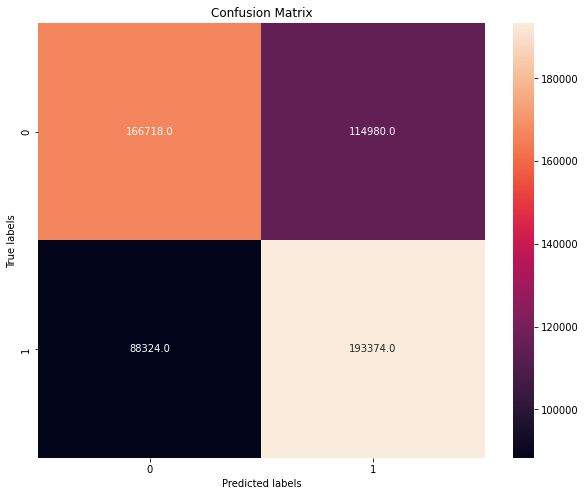

In [189]:
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(clf, np.asarray(x_train), np.asarray(y_train), cv=k_fold)
cm = confusion_matrix(y_train,y_pred)
df_cm = pd.DataFrame(cm, index = [0,1],columns = [0,1])
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_cm, annot=True,ax=ax,fmt=".1f")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
from sklearn import metrics

actual = y_train
predicted = y_pred
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.7469488601268025, 'Precision': 0.7897986219307966, 'Sensitivity_recall': 0.6730186227804245, 'Specificity': 0.8208790974731806, 'F1_score': 0.7267472170259744}
